In [22]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

# Part Two - Oliver

In [2]:
df = pd.read_csv("angel_timestamps.csv")
df['datetime'] = pd.to_datetime(df['Start Time'])
df = df.sort_values(by = 'datetime', ascending=True)

What is the longest time between timestamps? What is the average time between timestamps?

In [3]:
df['time_delta'] = df["datetime"].diff()
df.columns

Index(['Unnamed: 0', 'Start Time', 'datetime', 'time_delta'], dtype='object')

In [4]:
df = df.drop('Start Time', axis=1)


In [5]:
df['time_delta'].describe()

count                         5092
mean     0 days 06:37:41.868224666
std      0 days 23:37:50.115210269
min                0 days 00:00:00
25%                0 days 00:16:30
50%                0 days 00:29:08
75%         0 days 02:13:28.750000
max               25 days 01:35:12
Name: time_delta, dtype: object

Looks like the longest time between records was about 25 days, while the average time between records was about 6 hours.

What is the day with the most timestamps? How many events (timestamps) were on that day? 

In [6]:
df['days'] = pd.DatetimeIndex(df['datetime']).day
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['year'] = pd.DatetimeIndex(df['datetime']).year

In [7]:
df_by_day = df.groupby(['year','month','days']).count()
df_by_day # dataframe grouped by unique day

Unnamed: 0  datetime  time_delta
year month days                                  
2019 12    16            14        14          13
           17             9         9           9
           18             6         6           6
           19             5         5           5
           20            14        14          14
...                     ...       ...         ...
2023 10    18             1         1           1
           19             3         3           3
           20            10        10          10
           21             5         5           5
           22            20        20          20

[817 rows x 3 columns]

In [8]:
df_by_day[df_by_day['datetime'] == df_by_day['datetime'].max()]

,,,Unnamed: 0,datetime,time_delta
year,month,days,,,
2023,7,20,61,61,61


Looks like the day with the most records was July 20th, 2023. It had 61 datetime instances recorded.

What is the month with the most timestamps? How many events (timestamps) were on that month?

In [9]:
df_by_month = df.groupby(['month']).count()

In [10]:
df_by_month[df_by_month['datetime'] == df_by_month['datetime'].max()]

,Unnamed: 0,datetime,time_delta,days,year
month,,,,,
7,901,901,901,901,901


The month with the most records was July, with 901 instances recorded.

Create at least one visualization of this data, using matplotlib/pyplot or Seaborn (refer back to our earlier class activities on visualizing time series data).  What can they tell you about the data?

What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

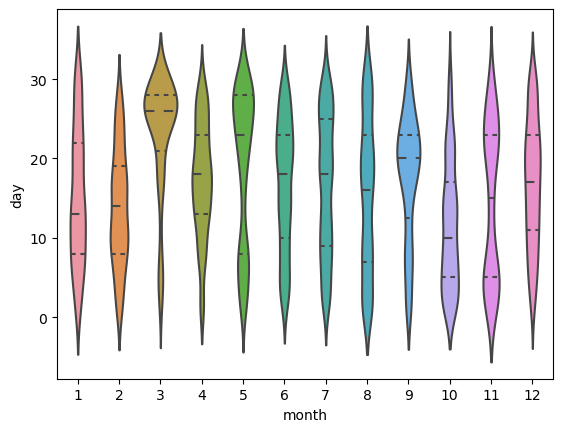

In [11]:
plot = sb.violinplot(x='month', y='days', data = df, inner='quartiles').set(xlabel = "month", ylabel = 'day')

visualization of when the rows were recorded in the month by day

My guess as to what the data is: I think this could be music or location data. The number of instances per day seems a little low to be spotify, however I don't know how often Angel listens to music. Given the highly variat time between instances beint recorded I think the most likely option is music. I think I could improve my guess by looking at other datasets of either music or location data and comparing them to this one.

# Part Four - Oliver

At least two clear questions that you ask and then (attempt to) answer via data analysis

In [12]:
df = pd.read_csv("TimeStamps")
df

,Unnamed: 0,TimeStamp
0,0,2022-10-17 20:47:00
1,1,2022-10-20 00:02:00
2,2,2022-10-20 00:02:00
3,3,2022-10-20 00:02:00
4,4,2022-10-20 00:02:00
...,...,...
9995,9995,2023-01-01 20:52:00
9996,9996,2023-01-01 20:52:00
9997,9997,2023-01-01 20:52:00
9998,9998,2023-01-01 20:52:00


Q1: What is the most common time of day that I listen to music? 

Q2: On which day of the daset did I listen to the most music?

In [13]:
df["hour"] = pd.DatetimeIndex(df['TimeStamp']).hour
df["day"] = pd.DatetimeIndex(df['TimeStamp']).day
df["month"] = pd.DatetimeIndex(df['TimeStamp']).month
df["year"] = pd.DatetimeIndex(df['TimeStamp']).year

In [14]:
df_common_hour = df.groupby("hour").count()

In [15]:
df_common_hour[df_common_hour["TimeStamp"] == df_common_hour["TimeStamp"].max()]

,Unnamed: 0,TimeStamp,day,month,year
hour,,,,,
20,1224,1224,1224,1224,1224


looks like the most common time among the dataset for me to listen to music is "20" which is 8pm which makes sense, that is when I typically do homework and listen to music.

In [16]:
df_days = df.groupby(['month', 'day', 'year']).count()

In [17]:
df_days[df_days['TimeStamp'] == df_days['TimeStamp'].max()]

,,,Unnamed: 0,TimeStamp,hour
month,day,year,,,
12,30,2022,449,449,449


looks like on December 30th, of 2022 I listened to the most music, I was on break at this time so it makes sense that I was listening to a lot of music.

I will visualize the amount of data recorded each day of the dataset

In [18]:

df['unique_date'] = pd.DatetimeIndex(df['TimeStamp']).date

In [19]:
grouped = df.groupby('unique_date').count()
grouped["date"] = grouped.index
grouped["count"] = grouped["TimeStamp"]
grouped

,Unnamed: 0,TimeStamp,hour,day,month,year,date,count
unique_date,,,,,,,,
2022-10-17,1,1,1,1,1,1,2022-10-17,1
2022-10-20,124,124,124,124,124,124,2022-10-20,124
2022-10-21,141,141,141,141,141,141,2022-10-21,141
2022-10-22,85,85,85,85,85,85,2022-10-22,85
2022-10-23,96,96,96,96,96,96,2022-10-23,96
...,...,...,...,...,...,...,...,...
2022-12-28,129,129,129,129,129,129,2022-12-28,129
2022-12-29,230,230,230,230,230,230,2022-12-29,230
2022-12-30,449,449,449,449,449,449,2022-12-30,449


In [20]:
grouped.drop(["Unnamed: 0","TimeStamp","hour","day","month", "year"], axis = 1)
melted = pd.melt(grouped, id_vars="date", value_vars="count")

([<matplotlib.axis.XTick at 0x162b09250>,
 [Text(0, 0, '2022-10-17'),
  Text(5, 0, '2022-10-24'),
  Text(10, 0, '2022-10-29'),
  Text(15, 0, '2022-11-03'),
  Text(20, 0, '2022-11-08'),
  Text(25, 0, '2022-11-13'),
  Text(30, 0, '2022-11-18'),
  Text(35, 0, '2022-11-23'),
  Text(40, 0, '2022-11-28'),
  Text(45, 0, '2022-12-03'),
  Text(50, 0, '2022-12-08'),
  Text(55, 0, '2022-12-13'),
  Text(60, 0, '2022-12-18'),
  Text(65, 0, '2022-12-23'),
  Text(70, 0, '2022-12-28')])

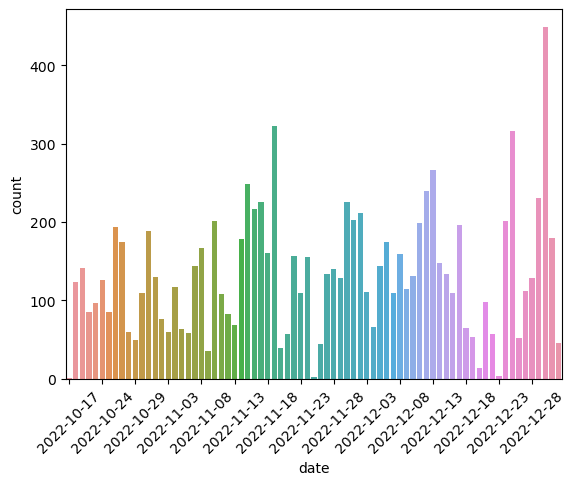

In [21]:
plot = sb.barplot(data=grouped, x = 'date', y = 'count')
plt.xticks(range(0, len(grouped['date']), 5), grouped['date'][::5], rotation=45)


Visualization of the number of instances per day.

# Part Two - Angel

In [24]:
oliver_timestamps = pd.read_csv("TimeStamps")

In [25]:
oliver_timestamps

,Unnamed: 0,TimeStamp
0,0,2022-10-17 20:47:00
1,1,2022-10-20 00:02:00
2,2,2022-10-20 00:02:00
3,3,2022-10-20 00:02:00
4,4,2022-10-20 00:02:00
...,...,...
9995,9995,2023-01-01 20:52:00
9996,9996,2023-01-01 20:52:00
9997,9997,2023-01-01 20:52:00
9998,9998,2023-01-01 20:52:00


In [26]:
oliver_timestamps.head()

,Unnamed: 0,TimeStamp
0,0,2022-10-17 20:47:00
1,1,2022-10-20 00:02:00
2,2,2022-10-20 00:02:00
3,3,2022-10-20 00:02:00
4,4,2022-10-20 00:02:00


In [27]:
oliver_timestamps["TimeStamp"] = pd.to_datetime(oliver_timestamps["TimeStamp"])

In [28]:
oliver_timestamps = oliver_timestamps.sort_index()
#Sorting the timestamps 

In [29]:
oliver_timestamps['Time Difference'] = oliver_timestamps['TimeStamp'].diff()
#Finding the difference between each timestamp

Answer: What is the longest time between timestamps? What is the average time between timestamps?

In [30]:
oliver_timestamps["Time Difference"].max() #The longest time between timestamps is 2 days, 3hrs and 15min.

Timedelta('2 days 03:15:00')

In [31]:
oliver_timestamps["Time Difference"].mean()
#The average time between timestamps is 10 minutes and 56 seconds.

Timedelta('0 days 00:10:56.735673567')

Answer: What is the day with the most timestamps? How many events (timestamps) were on that day? 

In [32]:
oliver_timestamps['days'] = pd.DatetimeIndex(oliver_timestamps['TimeStamp']).day

In [33]:
oliver_timestamps

,Unnamed: 0,TimeStamp,Time Difference,days
0,0,2022-10-17 20:47:00,NaT,17
1,1,2022-10-20 00:02:00,2 days 03:15:00,20
2,2,2022-10-20 00:02:00,0 days 00:00:00,20
3,3,2022-10-20 00:02:00,0 days 00:00:00,20
4,4,2022-10-20 00:02:00,0 days 00:00:00,20
...,...,...,...,...
9995,9995,2023-01-01 20:52:00,0 days 00:00:00,1
9996,9996,2023-01-01 20:52:00,0 days 00:00:00,1
9997,9997,2023-01-01 20:52:00,0 days 00:00:00,1
9998,9998,2023-01-01 20:52:00,0 days 00:00:00,1


In [34]:
day_counts = oliver_timestamps['days'].value_counts()

In [35]:
most_timestamps = day_counts.idxmax()

In [36]:
most_timestamps
#The day with the most timestamps is the 30th.

30

In [37]:
day_counts.max()
#There are 784 timestamps on this day.

784

What is the month with the most timestamps? How many events (timestamps) were on that month?

In [38]:
oliver_timestamps['months'] = pd.DatetimeIndex(oliver_timestamps['TimeStamp']).month

In [39]:
oliver_timestamps

,Unnamed: 0,TimeStamp,Time Difference,days,months
0,0,2022-10-17 20:47:00,NaT,17,10
1,1,2022-10-20 00:02:00,2 days 03:15:00,20,10
2,2,2022-10-20 00:02:00,0 days 00:00:00,20,10
3,3,2022-10-20 00:02:00,0 days 00:00:00,20,10
4,4,2022-10-20 00:02:00,0 days 00:00:00,20,10
...,...,...,...,...,...
9995,9995,2023-01-01 20:52:00,0 days 00:00:00,1,1
9996,9996,2023-01-01 20:52:00,0 days 00:00:00,1,1
9997,9997,2023-01-01 20:52:00,0 days 00:00:00,1,1
9998,9998,2023-01-01 20:52:00,0 days 00:00:00,1,1


In [40]:
monthly_counts = oliver_timestamps['months'].value_counts()

In [41]:
monthly_counts.idxmax()

12

In [42]:
monthly_counts.max()

4671

In [43]:
#The month with the most timestamps is December 2022 (since the data ranges from Oct 2022-Jan 2023), with 4671 events.

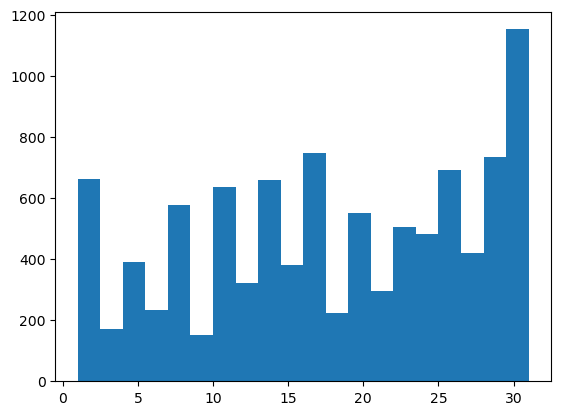

In [44]:
#Creating a visualization of the distirbution of the timestamps across days.
plt.hist(oliver_timestamps["days"], bins=20)
plt.show()

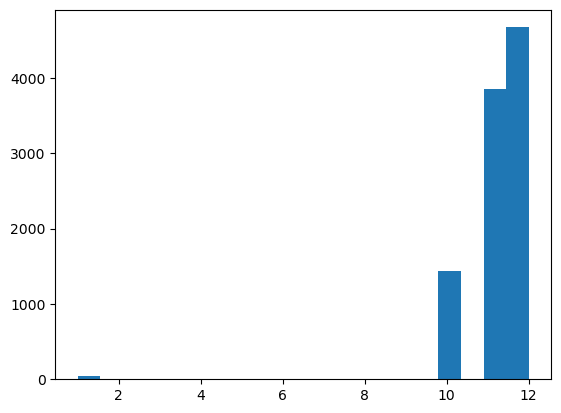

In [45]:
#Creating a visualization of the distirbution of the timestamps across months.
plt.hist(oliver_timestamps["months"], bins=20)
plt.show()

In [46]:
oliver_timestamps["days"].mean()

17.6679

In [47]:
oliver_timestamps = oliver_timestamps.set_index(["TimeStamp"], drop=False)

In [48]:
oliver_timestamps.head()

,Unnamed: 0,TimeStamp,Time Difference,days,months
TimeStamp,,,,,
2022-10-17 20:47:00,0,2022-10-17 20:47:00,NaT,17,10
2022-10-20 00:02:00,1,2022-10-20 00:02:00,2 days 03:15:00,20,10
2022-10-20 00:02:00,2,2022-10-20 00:02:00,0 days 00:00:00,20,10
2022-10-20 00:02:00,3,2022-10-20 00:02:00,0 days 00:00:00,20,10
2022-10-20 00:02:00,4,2022-10-20 00:02:00,0 days 00:00:00,20,10


In [49]:
oliver_timestamps.loc["2022-12"]

,Unnamed: 0,TimeStamp,Time Difference,days,months
TimeStamp,,,,,
2022-12-01 00:03:00,5284,2022-12-01 00:03:00,0 days 00:04:00,1,12
2022-12-01 00:05:00,5285,2022-12-01 00:05:00,0 days 00:02:00,1,12
2022-12-01 00:11:00,5286,2022-12-01 00:11:00,0 days 00:06:00,1,12
2022-12-01 00:15:00,5287,2022-12-01 00:15:00,0 days 00:04:00,1,12
2022-12-01 00:18:00,5288,2022-12-01 00:18:00,0 days 00:03:00,1,12
...,...,...,...,...,...
2022-12-31 22:53:00,9950,2022-12-31 22:53:00,0 days 00:01:00,31,12
2022-12-31 22:54:00,9951,2022-12-31 22:54:00,0 days 00:01:00,31,12
2022-12-31 22:54:00,9952,2022-12-31 22:54:00,0 days 00:00:00,31,12


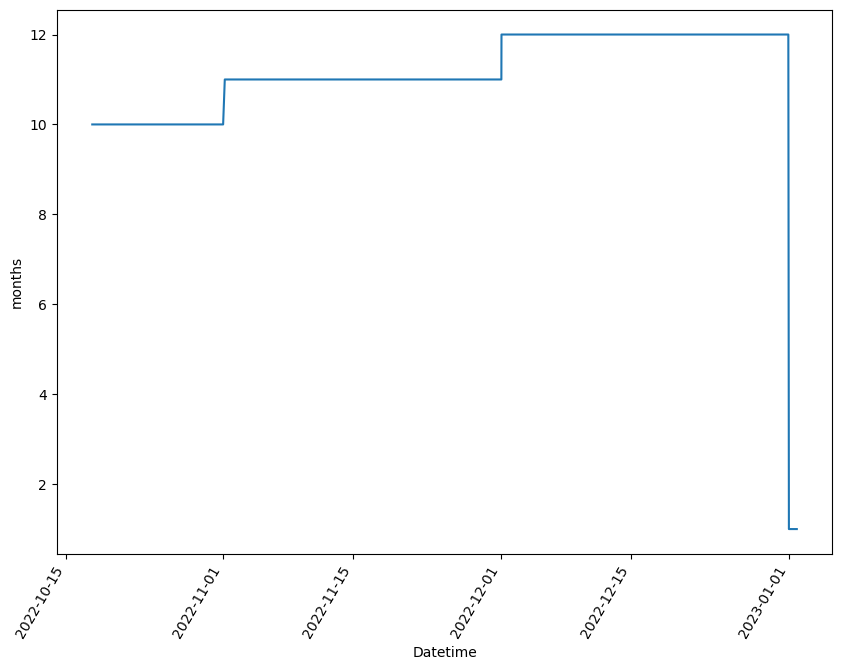

In [50]:
fig, axs = plt.subplots(figsize=(10, 8))

oliver_timestamps["months"].plot(kind='line', rot=60, ax=axs)


plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("months")

plt.show()

In [51]:
#From this histogram, I understand that the month of December 2022 had the most plays compared to any of the months we have data from.
#The 'days' histogram follows a somewhat normal distribution with the exception of a few outliers.

What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

I think the source of Oliver's timestamp data is a music streaming app such as Spotify/Apple Music. The reason I think this is because the number of timestamps/events per day correspond with a music streaming app, especially the time difference between each timestamp. For some, there is no diffrence, and for some there is a difference of a few seconds which may show a change in song. There are also differences of about 3 minutes or 5 minutes which could be the average length of one song played from beginning until the end. Having a titles column would be helpful in verifying if I'm correct.

In [52]:
#### Read your partner's analysis -- does it seem accurate? Did they guess the correct data source (or type of data source)?

After exachanging the analysis with my partner, I find that my partner got the source of the timestamps wrong. However the rest of their anyalysis is fitting.

####For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

They find that I watched the most Netflix towards the end of March this year, which corresponds with spring break. Looking at my Spotify and Location data would also help with determining this.

# Part 4 - Analyze and visualize an additional element from  your personal data - Angel

In [56]:
netflix_data = pd.read_csv("ViewingActivity.csv")

In [57]:
netflix_data.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Amantle,2023-10-22 18:40:42,00:00:11,Autoplayed: user action: None;,Suits: Season 8: Good Mudding (Episode 5),NaN,Netflix Windows App - Cadmium Windows Mobile,00:00:11,00:00:11,BW (Botswana)
1,Amantle,2023-10-22 17:51:14,00:47:39,NaN,Suits: Season 8: Revenue Per Square Foot (Epis...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:41:49,00:41:49,BW (Botswana)
2,Amantle,2023-10-22 17:47:23,00:03:25,NaN,"Suits: Season 8: Promises, Promises (Episode 3)",NaN,Netflix Windows App - Cadmium Windows Mobile,00:41:27,00:41:27,BW (Botswana)
3,Amantle,2023-10-22 04:04:07,00:00:13,Autoplayed: user action: None;,The Big Bang Theory: Season 7: The Friendship ...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:00:13,00:00:13,BW (Botswana)
4,Amantle,2023-10-22 03:43:53,00:19:29,NaN,The Big Bang Theory: Season 7: The Table Polar...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:19:30,00:19:30,BW (Botswana)


In [58]:
netflix_data

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Amantle,2023-10-22 18:40:42,00:00:11,Autoplayed: user action: None;,Suits: Season 8: Good Mudding (Episode 5),NaN,Netflix Windows App - Cadmium Windows Mobile,00:00:11,00:00:11,BW (Botswana)
1,Amantle,2023-10-22 17:51:14,00:47:39,NaN,Suits: Season 8: Revenue Per Square Foot (Epis...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:41:49,00:41:49,BW (Botswana)
2,Amantle,2023-10-22 17:47:23,00:03:25,NaN,"Suits: Season 8: Promises, Promises (Episode 3)",NaN,Netflix Windows App - Cadmium Windows Mobile,00:41:27,00:41:27,BW (Botswana)
3,Amantle,2023-10-22 04:04:07,00:00:13,Autoplayed: user action: None;,The Big Bang Theory: Season 7: The Friendship ...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:00:13,00:00:13,BW (Botswana)
4,Amantle,2023-10-22 03:43:53,00:19:29,NaN,The Big Bang Theory: Season 7: The Table Polar...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:19:30,00:19:30,BW (Botswana)
...,...,...,...,...,...,...,...,...,...,...
5088,Wamuchii,2021-01-22 17:50:59,00:09:26,NaN,Phone Swap,NaN,Firefox PC (Cadmium),01:17:22,Not latest view,US (United States)
5089,Wamuchii,2021-01-22 03:53:53,00:39:52,NaN,Phone Swap,NaN,Firefox PC (Cadmium),01:08:02,Not latest view,US (United States)
5090,Wamuchii,2021-01-22 02:57:50,00:22:23,NaN,Phone Swap,NaN,Firefox PC (Cadmium),00:22:23,Not latest view,US (United States)
5091,Wamuchii,2021-01-22 02:55:41,00:00:04,NaN,Mokalik (Mechanic),NaN,Firefox PC (Cadmium),00:00:04,00:00:04,US (United States)


Since my Netflix account is being used in different loactions, the first question I'd like to investigate is; in which location is the account being accessed the most? My speculation is that it is used the most in Botswana as two of the users live there, and I don't usually use it when school is in session.

In [59]:
netflix_data['Country'].value_counts()

BW (Botswana)         2678
US (United States)    2276
KE (Kenya)              93
IE (Ireland)            43
ZA (South Africa)        3
Name: Country, dtype: int64

In [60]:
#I find that it's been accessed 2678 times in Botswana.

Next, I want to know which profile watches the most shows.

In [61]:
netflix_data['Profile Name'].value_counts()

Amantle     2163
Angel       1916
Wamuchii     755
Gabriel      248
Kids          11
Name: Profile Name, dtype: int64

In [62]:
netflix_data['Title'].value_counts()

Lil Peep: Everybody’s Everything                                               26
Riverdale: Season 2: Chapter Sixteen: The Watcher in the Woods (Episode 3)     13
Fatherhood                                                                     13
Queen Charlotte: A Bridgerton Story: Season 1: Holding the King (Episode 4)    12
After                                                                          11
                                                                               ..
Season 1 Teaser: The Fall of the House of Usher                                 1
Ma_hook_primary_16x9                                                            1
Top Boy: Season 2: Prove Yourself (Episode 8)                                   1
Parks and Recreation: Season 4: Born & Raised (Episode 3)                       1
Mokalik (Mechanic)                                                              1
Name: Title, Length: 2701, dtype: int64

For the data wrangling section I want to keep the rows where "Angel" is the only Profile Name by filtering and remove the "Supplemental Video Type Column".

In [63]:
angel_netflix = netflix_data[netflix_data['Profile Name'] == "Angel"].drop("Supplemental Video Type", axis=1)
#1 indicates that we are removing a column

In [64]:
angel_netflix

,Profile Name,Start Time,Duration,Attributes,Title,Device Type,Bookmark,Latest Bookmark,Country
2163,Angel,2023-10-22 23:42:15,00:01:18,Autoplayed: user action: None;,Top Boy: Season 2: Prove Yourself (Episode 8),Netflix Chrome MAC (Cadmium) HTML 5,00:01:28,00:01:28,US (United States)
2164,Angel,2023-10-22 22:49:10,00:20:54,NaN,Top Boy: Season 2: We Ride Out for Family (Epi...,Netflix Chrome MAC (Cadmium) HTML 5,00:57:07,00:57:07,US (United States)
2165,Angel,2023-10-22 20:47:13,00:36:01,NaN,Top Boy: Season 2: We Ride Out for Family (Epi...,Netflix Chrome MAC (Cadmium) HTML 5,00:36:12,Not latest view,US (United States)
2166,Angel,2023-10-22 20:13:07,00:11:42,NaN,Top Boy: Season 2: De Capa y Espada (Episode 6),Netflix Chrome MAC (Cadmium) HTML 5,00:50:15,00:50:15,US (United States)
2167,Angel,2023-10-19 06:23:39,00:21:24,NaN,Top Boy: Season 2: De Capa y Espada (Episode 6),Netflix Chrome MAC (Cadmium) HTML 5,00:38:33,Not latest view,US (United States)
...,...,...,...,...,...,...,...,...,...
4074,Angel,2019-12-16 16:34:11,00:22:40,Autoplayed: user action: None;,Friends: Season 1: The One with All the Poker ...,Netflix Chrome MAC (Cadmium) HTML 5,00:22:40,00:22:40,US (United States)
4075,Angel,2019-12-16 16:30:32,00:03:10,NaN,Friends: Season 1: The One with the Two Parts:...,Netflix Chrome MAC (Cadmium) HTML 5,00:22:42,00:22:42,US (United States)
4076,Angel,2019-12-16 16:29:00,00:00:01,NaN,Friends: Season 1: The One with the Sonogram a...,Netflix Chrome MAC (Cadmium) HTML 5,00:00:01,00:00:01,US (United States)
4077,Angel,2019-12-16 16:28:45,00:00:08,NaN,Friends: Season 1: The One Where Monica Gets a...,Netflix Chrome MAC (Cadmium) HTML 5,00:00:08,00:00:08,US (United States)


In [65]:
angel_netflix.dropna()

,Profile Name,Start Time,Duration,Attributes,Title,Device Type,Bookmark,Latest Bookmark,Country
2163,Angel,2023-10-22 23:42:15,00:01:18,Autoplayed: user action: None;,Top Boy: Season 2: Prove Yourself (Episode 8),Netflix Chrome MAC (Cadmium) HTML 5,00:01:28,00:01:28,US (United States)
2173,Angel,2023-10-14 05:24:58,00:00:06,Autoplayed: user action: None;,Ma_hook_primary_16x9,Netflix Chrome MAC (Cadmium) HTML 5,00:00:06,00:00:06,US (United States)
2175,Angel,2023-10-13 18:42:55,00:00:05,Autoplayed: user action: None;,Season 1 Trailer: Surviving Summer,Netflix Chrome MAC (Cadmium) HTML 5,00:00:05,00:00:05,US (United States)
2179,Angel,2023-10-13 04:08:11,00:00:04,Autoplayed: user action: None;,Season 1 Teaser: The Fall of the House of Usher,Netflix Chrome MAC (Cadmium) HTML 5,00:00:04,00:00:04,US (United States)
2184,Angel,2023-10-08 18:44:43,00:02:38,Autoplayed: user action: None;,Top Boy: Season 2: Fully Loaded Headache (Epis...,Netflix Chrome MAC (Cadmium) HTML 5,00:02:38,Not latest view,US (United States)
...,...,...,...,...,...,...,...,...,...
4067,Angel,2019-12-16 22:10:19,00:22:38,Autoplayed: user action: None;,Friends: Season 1: The One with the Birth (Epi...,Netflix Chrome MAC (Cadmium) HTML 5,00:22:38,00:22:38,US (United States)
4068,Angel,2019-12-16 21:41:10,00:22:38,Autoplayed: user action: None;,Friends: Season 1: The One with the Ick Factor...,Netflix Chrome MAC (Cadmium) HTML 5,00:22:38,00:22:38,US (United States)
4069,Angel,2019-12-16 21:10:59,00:22:40,Autoplayed: user action: None;,Friends: Season 1: The One with the Fake Monic...,Netflix Chrome MAC (Cadmium) HTML 5,00:22:40,00:22:40,US (United States)
4070,Angel,2019-12-16 20:34:09,00:22:38,Autoplayed: user action: None;,Friends: Season 1: The One with the Evil Ortho...,Netflix Chrome MAC (Cadmium) HTML 5,00:22:38,00:22:38,US (United States)


For this visualization, I want to create a multi-plot grid where each subplot represents the distribution of the "months" column for each Netflix profile. This is useful to show how the viewing patterns (months) are distributed across different profiles.

In [66]:
netflix_data["Start Time"] = pd.to_datetime(netflix_data["Start Time"])

In [67]:
netflix_data['months'] = pd.DatetimeIndex(netflix_data['Start Time']).month

In [68]:
netflix_data['months']

0       10
1       10
2       10
3       10
4       10
        ..
5088     1
5089     1
5090     1
5091     1
5092     1
Name: months, Length: 5093, dtype: int64

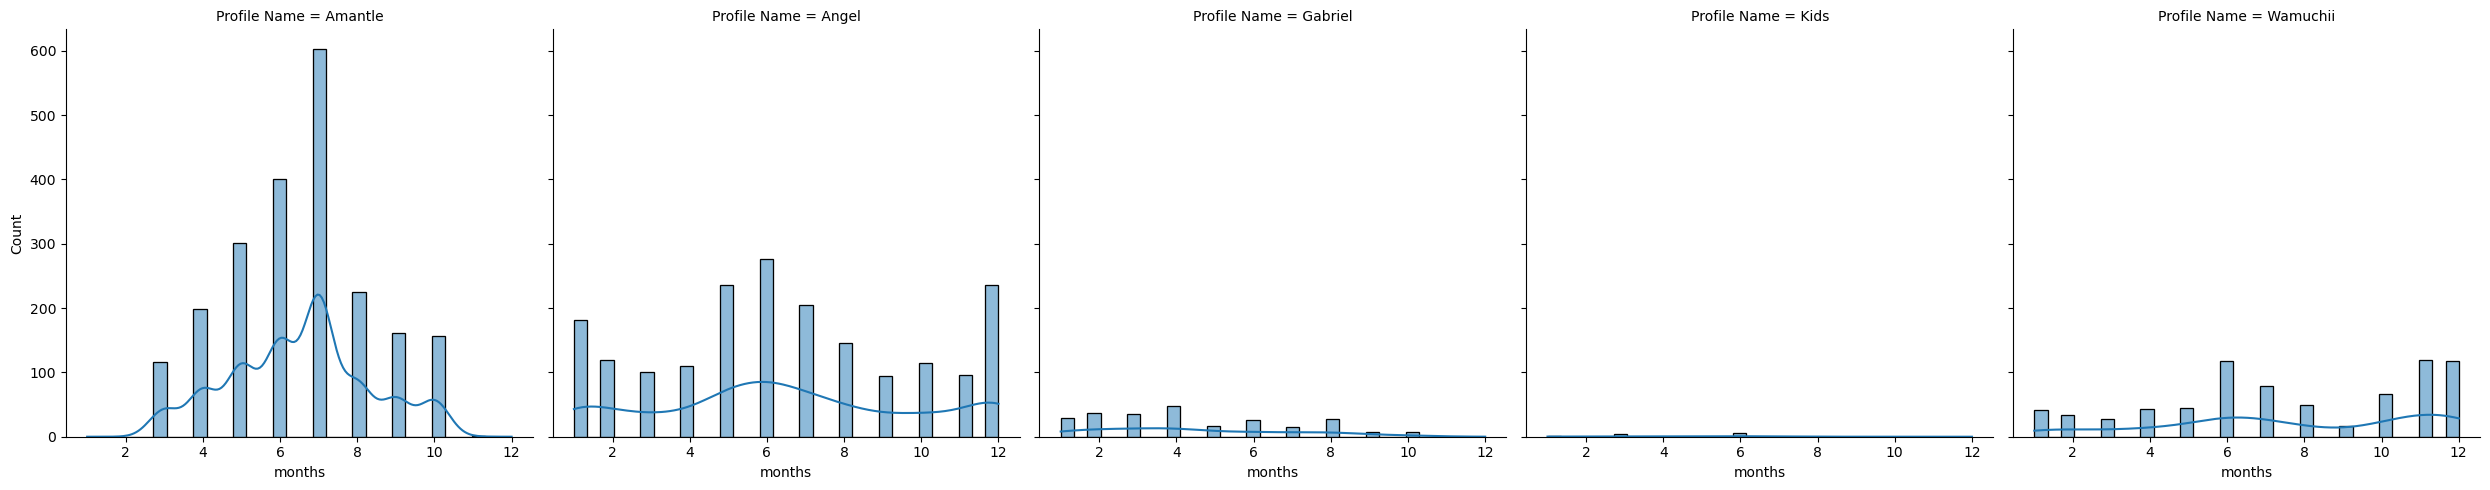

In [69]:
sns.displot(data=netflix_data, x="months", col="Profile Name", kde=True)

# Combined Visualization